In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
# raw data
swapRaw = pd.read_csv('swapRawData0305.csv')
spotRaw = pd.read_csv('spotRawData0305.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_19852\1485304686.py:2: DtypeWarning: Columns (2,4,6,8,12,14,16,20,22,24,26,28,30,34,36,38,40,42,44,46,50,52,54,56,58,62,64,66,68,70,72,74,76,80,82,88,90,92) have mixed types. Specify dtype option on import or set low_memory=False.
  swapRaw = pd.read_csv('swapRawData0305.csv')
C:\Users\User\AppData\Local\Temp\ipykernel_19852\1485304686.py:3: DtypeWarning: Columns (6,8,12,14,16,20,34,38,46,62,64,68,74,76,92) have mixed types. Specify dtype option on import or set low_memory=False.
  spotRaw = pd.read_csv('spotRawData0305.csv')


In [3]:
country_l = ['Australia'	, 'Austria'	, 'Belgium'	, 'Brazil'	, 'Bulgaria'	, 'Canada'	, 'Croatia'	, 'Cyprus'	, 'Czech Republic'	, 'Denmark'	, 'Egypt'	, 'Euro area'	, 'Finland'	, 'France'	, 'Germany'	, 'Greece'	, 'Hong Kong'	, 'Hungary'	, 'India'	, 'Indonesia'	, 'Ireland'	, 'Israel'	, 'Italy'	, 'Iceland'	, 'Japan'	, 'Kuwait'	, 'Malaysia'	, 'Mexico'	, 'Netherlands'	, 'New Zealand'	, 'Norway'	, 'Philippines,'	, 'Poland'	, 'Portugal'	, 'Russia'	, 'Saudi Arabia'	, 'Singapore'	, 'Slovakia'	, 'Slovenia'	, 'South Africa'	, 'South KOREA'	, 'Spain'	, 'Sweden'	, 'Switzerland'	, 'Taiwan'	, 'Thailand'	, 'Ukraine'	, 'United Kingdom'
]

In [4]:
newSpot = spotRaw.copy()
newSwap = swapRaw.copy()

In [5]:
dateRange = pd.date_range(start='1975-12-29', end='2022-12-30')
newSpot = pd.DataFrame(index=dateRange)
newSwap = pd.DataFrame(index=dateRange)

In [6]:
for i in range(spotRaw.shape[1]):
    if i % 2 == 0:
        tmpDf = spotRaw.iloc[:, i:i+2]
        tmpDf.dropna(inplace=True)
        tmpDf.index = tmpDf.iloc[:, 0]
        tmpDf = tmpDf.iloc[:, 1:2]
        tmpDf.index = (dt.datetime.strptime(str(i), "%Y/%m/%d") for i in tmpDf.index)
        # tmpDf = tmpDf[ tmpDf.index > dt.datetime(2009, 2, 8) ]
        tmpDf = tmpDf.iloc[::-1]
        
        newSpot[tmpDf.columns.values[0]] = tmpDf[tmpDf.columns.values[0]] # merge the data into newSpot

In [7]:
for i in range(swapRaw.shape[1]):
    if i % 2 == 0:
        tmpDf = swapRaw.iloc[:, i:i+2]
        tmpDf.dropna(inplace=True)
        tmpDf.index = tmpDf.iloc[:, 0]
        tmpDf = tmpDf.iloc[:, 1:2]
        tmpDf.index = (dt.datetime.strptime(str(i), "%Y/%m/%d") for i in tmpDf.index)
        # tmpDf = tmpDf[ tmpDf.index > dt.datetime(2009, 2, 8) ]
        tmpDf = tmpDf.iloc[::-1]
        
        newSwap[tmpDf.columns.values[0]] = tmpDf[tmpDf.columns.values[0]] # merge the data into newSpot

In [8]:
# newSpot = newSpot.fillna(method='bfill')
newSpot.columns =  country_l

In [9]:
# newSwap = newSwap.fillna(method='bfill')
newSwap.columns =  country_l

In [10]:
# converge the swap point
# pipVal = [0.0001, 0.0001, 0.001, 0.0001, 0.0001	,0.0001	,0.0001	,0.0001	,0.001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.01, 0.0001, 0.01, 0.0001, 1, 0.0001, 0.0001, 0.01, 0.01, 0.01, 0.00001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.001, 0.0001, 0.01, 0.0001, 0.0001, 0.0001, 0.001, 0.01	,0.0001	, 0.01	,0.01	, 0.0001	, 0.0001	, 0.001	, 0.01	, 0.0001	, 0.0001]
pipVal = [0.0001, 0.001, 0.001, 0.0001,	0.0001,	0.0001,	0.0001,	0.0001,	0.001,	0.0001,	0.0001,	0.0001,	0.0001,	0.0001,	0.0001,	0.0001,	0.0001,	0.01,	0.01,	1,	0.01,	0.0001,	1,	0.01,	0.01,	0.00001,	0.0001,	0.01,	0.0001,	0.0001,	0.0001,	1,	0.0001,	0.01,	0.0001,	0.0001,	0.0001,	0.001,	0.01,	0.0001,	0.01,	0.01,	0.0001,	0.0001,	1,	0.001,	0.0001,	0.0001]

country_l = ['Australia'	, 'Austria'	, 'Belgium'	, 'Brazil'	, 'Bulgaria'	, 'Canada'	, 'Croatia'	, 'Cyprus'	, 'Czech Republic'	, 'Denmark'	, 'Egypt'	, 'Euro area'	, 'Finland'	, 'France'	, 'Germany'	, 'Greece'	, 'Hong Kong'	, 'Hungary'	, 'India'	, 'Indonesia'	, 'Ireland'	, 'Israel'	, 'Italy'	, 'Iceland'	, 'Japan'	, 'Kuwait'	, 'Malaysia'	, 'Mexico'	, 'Netherlands'	, 'New Zealand'	, 'Norway'	, 'Philippines,'	, 'Poland'	, 'Portugal'	, 'Russia'	, 'Saudi Arabia'	, 'Singapore'	, 'Slovakia'	, 'Slovenia'	, 'South Africa'	, 'South KOREA'	, 'Spain'	, 'Sweden'	, 'Switzerland'	, 'Taiwan'	, 'Thailand'	, 'Ukraine'	, 'United Kingdom'
]

In [11]:
count = 0

try:
    for i in newSwap.columns:
        # print(i, pipVal[count])
        tmpPip = pipVal[count]
        newSwap[i] = newSwap[i] * tmpPip
        count += 1
except Exception as e:
    print(i)
    

In [12]:
fwd = newSpot + newSwap

In [13]:
fwd = fwd.loc[ fwd.index.is_month_end == True]
newSpot = newSpot.loc[ newSpot.index.is_month_end == True]

In [14]:

# fwdShift = fwd.shift(1)
fwdShift = fwd.shift(2)
fwdShift = fwdShift.iloc[2:, ]
newSpot = newSpot.iloc[2:, ]

In [15]:
newSpot

,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Croatia,Cyprus,Czech Republic,Denmark,...,Slovenia,South Africa,South KOREA,Spain,Sweden,Switzerland,Taiwan,Thailand,Ukraine,United Kingdom
1976-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-31,0.802697,18.3150,39.0500,NaN,NaN,0.9845,NaN,NaN,NaN,6.0569,...,NaN,0.8711,NaN,67.0900,4.4092,2.5381,NaN,NaN,NaN,0.522057
1976-04-30,0.808734,18.1490,38.8300,NaN,NaN,0.9817,NaN,NaN,NaN,6.0132,...,NaN,0.8707,NaN,67.3900,4.3898,2.5138,NaN,NaN,NaN,0.543183
1976-05-31,NaN,NaN,NaN,NaN,NaN,0.9800,NaN,NaN,NaN,6.1275,...,NaN,0.8707,NaN,67.8700,4.4444,2.4606,NaN,NaN,NaN,0.568343
1976-06-30,0.811359,18.4500,39.7300,NaN,NaN,0.9722,NaN,NaN,NaN,6.1538,...,NaN,0.8673,NaN,67.9100,4.4543,2.4740,NaN,NaN,NaN,0.561956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-31,1.459002,13.7401,40.2806,5.1222,1.9523,1.3093,7.5003,0.5844,24.5215,7.4268,...,239.2877,16.9807,1346.77,166.1414,10.6838,0.9743,30.435,36.467,36.7170,0.857927
2022-09-30,1.538462,14.0189,41.0982,5.4009,1.9928,1.3680,7.6688,0.5963,24.9935,7.5759,...,244.1445,18.0146,1439.20,169.5135,11.1554,0.9756,31.816,37.882,36.9323,0.899523
2022-10-31,1.559819,13.8083,40.4806,5.2966,1.9654,1.3596,7.5584,0.5873,24.5907,7.4701,...,240.4757,18.1341,1421.68,166.9662,10.9460,0.9958,32.146,37.947,36.7170,0.860956


In [16]:
fwdShift

,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Croatia,Cyprus,Czech Republic,Denmark,...,Slovenia,South Africa,South KOREA,Spain,Sweden,Switzerland,Taiwan,Thailand,Ukraine,United Kingdom
1976-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,1.389689,12.74696,37.369261,4.794160,1.811929,1.265756,6.985624,NaN,23.01675,6.893267,...,221.992871,15.5517,1238.8025,154.13332,9.740855,0.955794,28.9459,34.08334,29.403028,0.790462
2022-08-31,1.453540,13.15206,38.556860,5.227452,1.869013,1.289363,7.199380,0.559388,23.79440,7.109866,...,229.047619,16.2890,1299.3745,159.03159,10.226201,0.953199,29.6533,35.18922,29.548029,0.824829
2022-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-31,1.459031,13.71122,40.195930,5.162538,1.948230,1.309726,7.486255,0.583172,24.61785,7.411302,...,238.784714,17.0318,1346.7635,165.79217,10.667448,0.971847,30.3900,36.46072,36.720787,0.857942


In [17]:
excessReturn = np.log(fwdShift)-np.log(newSpot)

c:\Users\User\Anaconda3\envs\currPredict\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [18]:
excessReturn

,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Croatia,Cyprus,Czech Republic,Denmark,...,Slovenia,South Africa,South KOREA,Spain,Sweden,Switzerland,Taiwan,Thailand,Ukraine,United Kingdom
1976-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-31,-0.003750,-0.043740,-0.043736,0.020340,-0.043598,-0.015344,-0.040948,-0.043742,-0.030100,-0.043612,...,-0.043737,-0.041587,-0.035826,-0.043736,-0.043775,-0.021896,-0.026020,-0.035668,-0.217223,-0.039343
2022-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-31,-0.066798,-0.007055,-0.007057,-0.025637,-0.008775,-0.037373,-0.009591,-0.007054,0.001103,-0.007902,...,-0.007057,-0.062712,-0.054135,-0.007056,-0.025777,-0.024348,-0.056174,-0.039955,0.000103,-0.003507


In [19]:
excessReturn.to_csv('er.csv')

In [20]:
##### create momentum strategy

In [21]:
# filter only the month end data
momDf = excessReturn.copy()
momDf = momDf.loc[ momDf.index.is_month_end == True]
momDf.fillna(0, inplace=True)

In [22]:
port = pd.DataFrame(index=momDf.index, columns=momDf.columns)

In [23]:
momDf

,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Croatia,Cyprus,Czech Republic,Denmark,...,Slovenia,South Africa,South KOREA,Spain,Sweden,Switzerland,Taiwan,Thailand,Ukraine,United Kingdom
1976-02-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1976-03-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1976-04-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1976-05-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1976-06-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-08-31,-0.003750,-0.043740,-0.043736,0.020340,-0.043598,-0.015344,-0.040948,-0.043742,-0.030100,-0.043612,...,-0.043737,-0.041587,-0.035826,-0.043736,-0.043775,-0.021896,-0.026020,-0.035668,-0.217223,-0.039343
2022-09-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-10-31,-0.066798,-0.007055,-0.007057,-0.025637,-0.008775,-0.037373,-0.009591,-0.007054,0.001103,-0.007902,...,-0.007057,-0.062712,-0.054135,-0.007056,-0.025777,-0.024348,-0.056174,-0.039955,0.000103,-0.003507


In [24]:
momDf_shift = momDf.shift(1)

In [25]:
L_cutoff = pd.to_numeric(momDf_shift.quantile(.17, axis=1, numeric_only=False))
H_cutoff = pd.to_numeric(momDf_shift.quantile(.83, axis=1, numeric_only=False))

In [26]:
H_cutoff

1976-02-29         NaN
1976-03-31    0.000000
1976-04-30    0.000000
1976-05-31    0.000000
1976-06-30    0.000000
                ...   
2022-07-31    0.000000
2022-08-31    0.000000
2022-09-30    0.000012
2022-10-31    0.000000
2022-11-30   -0.000462
Name: 0.83, Length: 562, dtype: float64

In [27]:
L_cutoff

1976-02-29         NaN
1976-03-31    0.000000
1976-04-30    0.000000
1976-05-31    0.000000
1976-06-30    0.000000
                ...   
2022-07-31    0.000000
2022-08-31    0.000000
2022-09-30   -0.043746
2022-10-31    0.000000
2022-11-30   -0.053905
Name: 0.17, Length: 562, dtype: float64

In [28]:
try:
    port[momDf_shift.gt(H_cutoff, axis=0)] = 'High'
    port[momDf_shift.lt(L_cutoff, axis=0)] = 'Low'
except Exception as e:
    print(e)
    pass

In [29]:
port['United Kingdom']

1976-02-29    NaN
1976-03-31    NaN
1976-04-30    NaN
1976-05-31    NaN
1976-06-30    NaN
             ... 
2022-07-31    NaN
2022-08-31    NaN
2022-09-30    NaN
2022-10-31    NaN
2022-11-30    NaN
Name: United Kingdom, Length: 562, dtype: object

In [30]:
port.loc['2022-11-30']

Australia          Low
Austria            NaN
Belgium            NaN
Brazil             NaN
Bulgaria           NaN
Canada             NaN
Croatia            NaN
Cyprus             NaN
Czech Republic    High
Denmark            NaN
Egypt              Low
Euro area         High
Finland            NaN
France             NaN
Germany            NaN
Greece             NaN
Hong Kong          NaN
Hungary            NaN
India             High
Indonesia          NaN
Ireland           High
Israel             Low
Italy              Low
Iceland            NaN
Japan              Low
Kuwait             NaN
Malaysia          High
Mexico             NaN
Netherlands        NaN
New Zealand        NaN
Norway             NaN
Philippines,       NaN
Poland            High
Portugal           NaN
Russia            High
Saudi Arabia       NaN
Singapore          NaN
Slovakia           NaN
Slovenia           NaN
South Africa       Low
South KOREA        Low
Spain              NaN
Sweden             NaN
Switzerland

In [31]:
excessReturn

,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Croatia,Cyprus,Czech Republic,Denmark,...,Slovenia,South Africa,South KOREA,Spain,Sweden,Switzerland,Taiwan,Thailand,Ukraine,United Kingdom
1976-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-31,-0.003750,-0.043740,-0.043736,0.020340,-0.043598,-0.015344,-0.040948,-0.043742,-0.030100,-0.043612,...,-0.043737,-0.041587,-0.035826,-0.043736,-0.043775,-0.021896,-0.026020,-0.035668,-0.217223,-0.039343
2022-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-31,-0.066798,-0.007055,-0.007057,-0.025637,-0.008775,-0.037373,-0.009591,-0.007054,0.001103,-0.007902,...,-0.007057,-0.062712,-0.054135,-0.007056,-0.025777,-0.024348,-0.056174,-0.039955,0.000103,-0.003507


In [32]:
# shouldn't need this
# monRet = excessReturn.resample('M').agg(lambda x: (x + 1).prod() - 1)

In [33]:
mom_port = pd.DataFrame(index=port.index)
mom_port = mom_port.join(port)

In [34]:
# 模擬當時情況
mom_port.ffill(axis=0, limit=1)

,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Croatia,Cyprus,Czech Republic,Denmark,...,Slovenia,South Africa,South KOREA,Spain,Sweden,Switzerland,Taiwan,Thailand,Ukraine,United Kingdom
1976-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,NaN,NaN,NaN,High,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Low,NaN,NaN,Low,NaN,NaN,NaN,High,NaN
2022-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-30,NaN,NaN,NaN,High,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Low,NaN,NaN,NaN,Low,NaN
2022-10-31,NaN,NaN,NaN,High,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Low,NaN,NaN,NaN,Low,NaN


In [35]:
mom_port.loc['2022-11-30'].describe()

count      16
unique      2
top       Low
freq        8
Name: 2022-11-30 00:00:00, dtype: object

In [36]:
lag_ret = excessReturn.shift(1)
unique_port = ['High', 'Low']
N_firm = pd.DataFrame(index=excessReturn.index, columns=unique_port)

In [37]:
RET_port = pd.DataFrame(index=mom_port.index, columns=unique_port)

In [38]:
for p in unique_port:
    TMP_RET = excessReturn[mom_port==p].apply(pd.to_numeric).mean(axis=1)
    RET_port[p] = TMP_RET
    
    # N_firm[p] = TMP_RET.count(axis=1) # axis=1 => 存放每月有多少支股票屬於這個 particular ranking

RET_port['High-Low'] = RET_port['High'] - RET_port['Low']

RET_port

,High,Low,High-Low
1976-02-29,NaN,NaN,NaN
1976-03-31,NaN,NaN,NaN
1976-04-30,NaN,NaN,NaN
1976-05-31,NaN,NaN,NaN
1976-06-30,NaN,NaN,NaN
...,...,...,...
2022-07-31,NaN,NaN,NaN
2022-08-31,NaN,NaN,NaN
2022-09-30,NaN,NaN,NaN
2022-10-31,NaN,NaN,NaN


In [39]:
RET_port[(RET_port != 0).all(1)]

,High,Low,High-Low
1976-02-29,NaN,NaN,NaN
1976-03-31,NaN,NaN,NaN
1976-04-30,NaN,NaN,NaN
1976-05-31,NaN,NaN,NaN
1976-06-30,NaN,NaN,NaN
...,...,...,...
2022-07-31,NaN,NaN,NaN
2022-08-31,NaN,NaN,NaN
2022-09-30,NaN,NaN,NaN
2022-10-31,NaN,NaN,NaN


In [40]:
RET_port.dropna(inplace=True)


In [41]:
RET_port

,High,Low,High-Low
1989-08-31,0.028588,-0.001153,0.029740
1991-01-31,0.004341,0.033358,-0.029017
1991-02-28,-0.026908,-0.002859,-0.024049
1992-09-30,0.038217,-0.145091,0.183308
1993-06-30,-0.030272,-0.054404,0.024132
1994-02-28,0.028218,-0.031202,0.059421
1994-03-31,0.025660,-0.034353,0.060012
1994-11-30,-0.010633,0.000506,-0.011139
1995-08-31,-0.014517,-0.056850,0.042332
1997-03-31,0.011730,-0.030127,0.041857


In [42]:
RET_port['High-Low'].head(180)

1989-08-31    0.029740
1991-01-31   -0.029017
1991-02-28   -0.024049
1992-09-30    0.183308
1993-06-30    0.024132
1994-02-28    0.059421
1994-03-31    0.060012
1994-11-30   -0.011139
1995-08-31    0.042332
1997-03-31    0.041857
1997-04-30    0.034394
1998-09-30    0.063251
1999-06-30    0.058900
2000-02-29    0.186795
2000-03-31    0.120995
2000-08-31    0.059247
2002-01-31    0.059318
2002-02-28    0.016685
2003-03-31    0.034042
2003-04-30    0.067781
2004-06-30    0.041770
2005-02-28    0.050831
2005-03-31    0.006997
2005-11-30    0.043198
2006-08-31    0.009002
2008-01-31    0.040215
2008-02-29    0.060342
2008-03-31    0.122798
2008-04-30    0.067330
2009-09-30    0.059707
2010-06-30    0.140679
2011-02-28    0.065868
2011-03-31    0.039018
2011-11-30    0.033341
2013-01-31    0.049083
2013-02-28    0.030117
2014-03-31    0.054939
2014-04-30    0.028122
2015-09-30    0.098871
2016-11-30    0.010820
2017-08-31    0.070263
2019-01-31    0.056768
2019-02-28    0.060316
2020-09-30 

In [43]:
RET_port['Cum_ret'] = (1 + RET_port['High-Low']).cumprod() - 1

In [44]:
RET_port['High-Low'].head(180)

1989-08-31    0.029740
1991-01-31   -0.029017
1991-02-28   -0.024049
1992-09-30    0.183308
1993-06-30    0.024132
1994-02-28    0.059421
1994-03-31    0.060012
1994-11-30   -0.011139
1995-08-31    0.042332
1997-03-31    0.041857
1997-04-30    0.034394
1998-09-30    0.063251
1999-06-30    0.058900
2000-02-29    0.186795
2000-03-31    0.120995
2000-08-31    0.059247
2002-01-31    0.059318
2002-02-28    0.016685
2003-03-31    0.034042
2003-04-30    0.067781
2004-06-30    0.041770
2005-02-28    0.050831
2005-03-31    0.006997
2005-11-30    0.043198
2006-08-31    0.009002
2008-01-31    0.040215
2008-02-29    0.060342
2008-03-31    0.122798
2008-04-30    0.067330
2009-09-30    0.059707
2010-06-30    0.140679
2011-02-28    0.065868
2011-03-31    0.039018
2011-11-30    0.033341
2013-01-31    0.049083
2013-02-28    0.030117
2014-03-31    0.054939
2014-04-30    0.028122
2015-09-30    0.098871
2016-11-30    0.010820
2017-08-31    0.070263
2019-01-31    0.056768
2019-02-28    0.060316
2020-09-30 

In [45]:
RET_port['Cum_ret'].head(160)

1989-08-31    0.029740
1991-01-31   -0.000140
1991-02-28   -0.024185
1992-09-30    0.154690
1993-06-30    0.182555
1994-02-28    0.252823
1994-03-31    0.328008
1994-11-30    0.313215
1995-08-31    0.368807
1997-03-31    0.426100
1997-04-30    0.475150
1998-09-30    0.568454
1999-06-30    0.660835
2000-02-29    0.971070
2000-03-31    1.209560
2000-08-31    1.340469
2002-01-31    1.479300
2002-02-28    1.520668
2003-03-31    1.606476
2003-04-30    1.783145
2004-06-30    1.899398
2005-02-28    2.046776
2005-03-31    2.068094
2005-11-30    2.200628
2006-08-31    2.229439
2008-01-31    2.359312
2008-02-29    2.562020
2008-03-31    2.999429
2008-04-30    3.268713
2009-09-30    3.523587
2010-06-30    4.159960
2011-02-28    4.499836
2011-03-31    4.714426
2011-11-30    4.904949
2013-01-31    5.194781
2013-02-28    5.381352
2014-03-31    5.731937
2014-04-30    5.921249
2015-09-30    6.605563
2016-11-30    6.687856
2017-08-31    7.228024
2019-01-31    7.695117
2019-02-28    8.219574
2020-09-30 

In [46]:
RET_port['Cum_ret']

1989-08-31    0.029740
1991-01-31   -0.000140
1991-02-28   -0.024185
1992-09-30    0.154690
1993-06-30    0.182555
1994-02-28    0.252823
1994-03-31    0.328008
1994-11-30    0.313215
1995-08-31    0.368807
1997-03-31    0.426100
1997-04-30    0.475150
1998-09-30    0.568454
1999-06-30    0.660835
2000-02-29    0.971070
2000-03-31    1.209560
2000-08-31    1.340469
2002-01-31    1.479300
2002-02-28    1.520668
2003-03-31    1.606476
2003-04-30    1.783145
2004-06-30    1.899398
2005-02-28    2.046776
2005-03-31    2.068094
2005-11-30    2.200628
2006-08-31    2.229439
2008-01-31    2.359312
2008-02-29    2.562020
2008-03-31    2.999429
2008-04-30    3.268713
2009-09-30    3.523587
2010-06-30    4.159960
2011-02-28    4.499836
2011-03-31    4.714426
2011-11-30    4.904949
2013-01-31    5.194781
2013-02-28    5.381352
2014-03-31    5.731937
2014-04-30    5.921249
2015-09-30    6.605563
2016-11-30    6.687856
2017-08-31    7.228024
2019-01-31    7.695117
2019-02-28    8.219574
2020-09-30 

In [47]:
RET_port['Dollar Investing'] = 1
RET_port.loc[RET_port.index[0], 'Dollar Investing'] = 1

tmp = 0
for i in RET_port.index:
    if tmp == 0:
        tmp += 1
        pass
    else:
        next = RET_port.loc[i, 'Dollar Investing']
        update = RET_port.loc[RET_port.index[tmp-1], 'Dollar Investing']
        next = update*(1+RET_port.loc[RET_port.index[tmp-1], 'High-Low'])
        RET_port.loc[i, 'Dollar Investing'] = next
        tmp += 1

In [48]:
import matplotlib.pyplot as plt

In [64]:
RET_port.index[29]

Timestamp('2009-09-30 00:00:00')

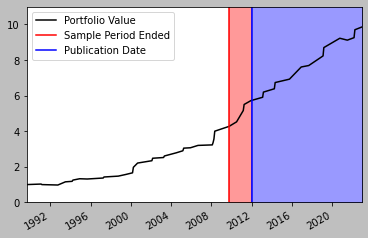

In [68]:
plt.style.use('grayscale')
fig, ax = plt.subplots()
RET_port['Dollar Investing'].plot(label='Portfolio Value')
ax.set_xlim([dt.date(1989, 8, 31), dt.date(2022, 11, 30)])  
ax.set_ylim([0, 11])  

plt.axvline(x = RET_port.index[29], color = 'r', label = 'Sample Period Ended')
plt.axvline(x = '2012-01-01', color = 'b', label = 'Publication Date')

postSam = '2010-01-31'
postPub = '2012-01-01'

ax.fill_between(RET_port.index, 0, 11, where= (RET_port.index >= RET_port.index[29]) & (RET_port.index <= postPub),  color='red', alpha=0.4)
ax.fill_between(RET_port.index, 0, 11, where= RET_port.index >= '2011-8-1',  color='blue', alpha=0.4)

plt.legend(loc='best')
plt.savefig('writing/pics/momCum.png', dpi=300)
plt.show()
plt.close()

In [50]:
RET_port

,High,Low,High-Low,Cum_ret,Dollar Investing
1989-08-31,0.028588,-0.001153,0.029740,0.029740,1.000000
1991-01-31,0.004341,0.033358,-0.029017,-0.000140,1.029740
1991-02-28,-0.026908,-0.002859,-0.024049,-0.024185,0.999860
1992-09-30,0.038217,-0.145091,0.183308,0.154690,0.975815
1993-06-30,-0.030272,-0.054404,0.024132,0.182555,1.154690
1994-02-28,0.028218,-0.031202,0.059421,0.252823,1.182555
1994-03-31,0.025660,-0.034353,0.060012,0.328008,1.252823
1994-11-30,-0.010633,0.000506,-0.011139,0.313215,1.328008
1995-08-31,-0.014517,-0.056850,0.042332,0.368807,1.313215
1997-03-31,0.011730,-0.030127,0.041857,0.426100,1.368807


In [51]:
# end of the original sample: 2012-09-30
# publication date: 21 November 2017 (let use 2017-11-31)

In [52]:
RET_port['beta1'] = 0
RET_port['beta2'] = 0
for i in RET_port.index:
    if (i < dt.datetime(2010, 1, 31) ):
        RET_port.loc[i, 'beta1'] = 0
    elif (i > dt.datetime(2010, 1, 31) ) and (i < dt.datetime(2012, 1, 1) ):
        RET_port.loc[i, 'beta1'] = 1
    elif i > dt.datetime(2012, 1, 31):
        RET_port.loc[i, 'beta2'] = 1
    else:
        RET_port.loc[i, 'beta2'] = 0


In [53]:
import statsmodels.formula.api as smf

In [54]:
reg_exp = 'High-Low ~ beta1+beta2'
nw_ols1 = smf.ols(formula=reg_exp, data=RET_port).fit(cov_type='HAC', cov_kwds={'maxlags':1}, use_t=True)
nw_ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   High   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     4.365
Date:                Thu, 30 Mar 2023   Prob (F-statistic):             0.0185
Time:                        22:10:31   Log-Likelihood:                 97.941
No. Observations:                  48   AIC:                            -189.9
Df Residuals:                      45   BIC:                            -184.3
Df Model:                           2                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0277      0.008      3.674      0.001       0.013       0.043
beta1          0.0049      0.011      0.462      0.647      -0.017       0.026
beta2         -0.0208      0.009     -2.248      0.030      -0.039      -0.002
==============================================================================
Omnibus:                       14.450   Durbin-Watson:                   1.588
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.580
Skew:                           0.914   Prob(JB):                     2.06e-05
Kurtosis:                       5.730   Cond. No.                         3.97
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

In [55]:
nw_ols1.pvalues

Intercept    0.000633
beta1        0.646510
beta2        0.029525
dtype: float64